# Temperature Forecast Project using ML

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air
temperatures forecast of the LDAPS model operated by the Korea Meteorological
Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017.
The input data is largely composed of the LDAPS model&#39;s next-day forecast data, in-situ
maximum and minimum temperatures of present-day, and geographic auxiliary variables. There
are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast
validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd (&#39;2013-06-30&#39; to &#39;2017-08-30&#39;)
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20
to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3
to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to
98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to
100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied
lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied
lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to
213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5
h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-
11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-
17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-
23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-
5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-
11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation
(12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation
(18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day
and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [ ]:
# importing the required libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
# printing the no. of columns and rows.
print('The number of columns   ',df.shape[1])
print('The number of rows  ',df.shape[0])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [ ]:
# Relationship of Credit_History & Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='station', hue='Next_Tmax', data=df)
plt.show()

In [ ]:
# Relationship of Credit_History & Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(x='station', hue='Next_Tmin', data=df)
plt.show()

The have float64 is the only dtype.

In [ ]:
# checking the number of null values
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.columns.tolist()

In [ ]:
# To check the percentage of the missing data. 
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

In [ ]:
# to check the no. of unique values present in the data.
df.nunique().to_frame("No. of unique value")

In [ ]:
# working on the missing data using the i loc feature. 
df['station'].iloc[7750] = 0.0 # (since there are only two missing values in the df that are the last to values thorefore, based on the data we have given the new values)
df['station'].iloc[7751] = 1.0

In [73]:
# replacing the missing dates using the iloc features. 
df['Date'].iloc[7750] = '30-08-2017'
df['Date'].iloc[7751] = '30-08-2017'

In [74]:
# We shall proceed with filling the missing values using the forward fill as in my opinion the values 
df.fillna(method='ffill', inplace=True)

In [75]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [76]:
# Changing the format of the dataframe. 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [77]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year']  = df['Date'].dt.year

In [78]:
# Dropping the date columns 
df.drop(["Date"],axis=1, inplace=True)

In [79]:
# checking the correlation between the features. 
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,1.000000,0.112112,0.131542,-0.066594,-0.165650,0.068913,0.104084,0.004262,-0.133164,0.006728,...,-0.237428,-0.118562,-0.256113,-0.090443,-0.018771,0.107311,0.128552,-0.000449,-0.000702,-0.000632
Present_Tmax,0.112112,1.000000,0.618556,-0.204582,-0.308430,0.574712,0.631731,-0.125331,0.128107,-0.307408,...,-0.053037,0.005522,-0.187254,-0.107231,-0.025125,0.613377,0.624810,0.146294,-0.143359,0.060049
Present_Tmin,0.131542,0.618556,1.000000,0.121375,-0.021003,0.475268,0.775718,-0.033949,-0.017817,0.095303,...,-0.078343,-0.047783,-0.249497,-0.146940,0.053955,0.473438,0.799022,0.089102,-0.109779,0.034884
LDAPS_RHmin,-0.066594,-0.204582,0.121375,1.000000,0.576600,-0.565265,0.085025,0.290631,-0.067878,0.606244,...,0.086916,-0.076077,0.101901,0.123485,0.247154,-0.443221,0.093880,-0.194455,-0.059327,0.001965
LDAPS_RHmax,-0.165650,-0.308430,-0.021003,0.576600,1.000000,-0.374495,-0.121587,0.137244,0.244137,0.429820,...,0.195016,0.025564,0.176462,0.218723,0.154055,-0.290630,-0.078832,-0.120242,-0.020533,-0.147498
LDAPS_Tmax_lapse,0.068913,0.574712,0.475268,-0.565265,-0.374495,1.000000,0.657472,-0.307419,0.038767,-0.423312,...,-0.041809,0.090053,-0.177689,-0.161238,0.040841,0.837673,0.593139,0.103748,-0.156627,0.013206
LDAPS_Tmin_lapse,0.104084,0.631731,0.775718,0.085025,-0.121587,0.657472,1.000000,-0.129924,-0.144932,0.022003,...,-0.095343,-0.026447,-0.193602,-0.184087,0.151091,0.598891,0.886497,0.027180,-0.162741,-0.001808
LDAPS_WS,0.004262,-0.125331,-0.033949,0.290631,0.137244,-0.307419,-0.129924,1.000000,0.008026,0.289114,...,0.036601,-0.059375,0.190759,0.171364,0.121224,-0.342904,-0.098490,-0.107528,-0.044420,-0.115632
LDAPS_LH,-0.133164,0.128107,-0.017817,-0.067878,0.244137,0.038767,-0.144932,0.008026,1.000000,-0.152428,...,0.132641,0.025709,0.054895,0.086405,-0.041063,0.146836,-0.063710,0.061905,-0.025237,0.053829
LDAPS_CC1,0.006728,-0.307408,0.095303,0.606244,0.429820,-0.423312,0.022003,0.289114,-0.152428,1.000000,...,-0.008097,-0.006814,-0.014033,-0.020667,0.213084,-0.440748,-0.003693,-0.204274,-0.022356,-0.068065


In [80]:
# for the Next Tmax value 
X = df.drop(['Next_Tmax'],axis=1)
y = df['Next_Tmax']

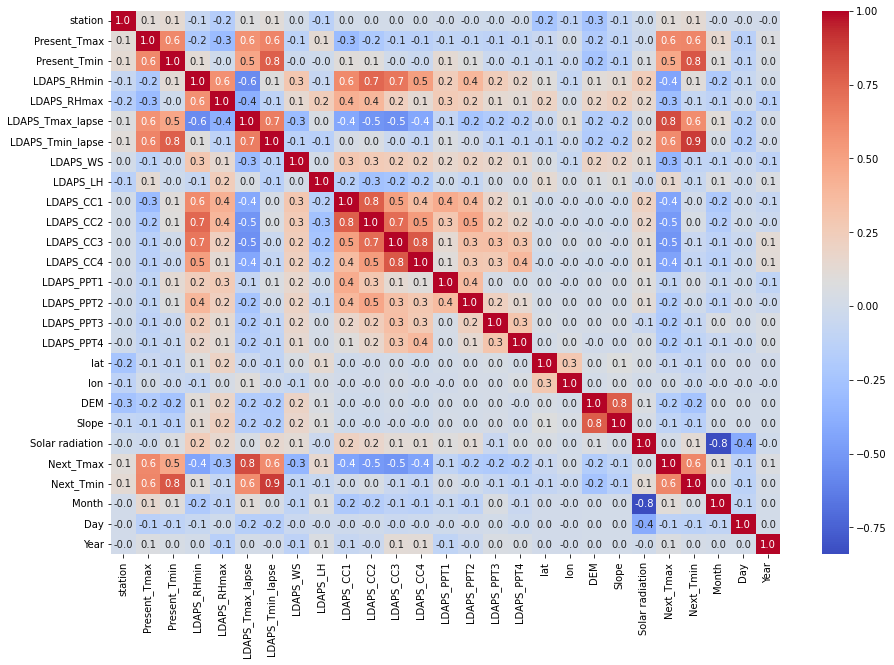

In [81]:
# correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.show()


In [82]:
# To check for the skewnwss
df.skew()

station            -0.000008
Present_Tmax       -0.262761
Present_Tmin       -0.365327
LDAPS_RHmin         0.305376
LDAPS_RHmax        -0.840464
LDAPS_Tmax_lapse   -0.237722
LDAPS_Tmin_lapse   -0.576234
LDAPS_WS            1.572524
LDAPS_LH            0.677272
LDAPS_CC1           0.435814
LDAPS_CC2           0.471318
LDAPS_CC3           0.640210
LDAPS_CC4           0.663585
LDAPS_PPT1          5.077981
LDAPS_PPT2          5.776895
LDAPS_PPT3          6.458810
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339228
Next_Tmin          -0.402800
Month              -0.196329
Day                -0.009133
Year               -0.000365
dtype: float64

Very less skewness is observed in the dataframe. 
- LDAPS_PPT1          5.367675
- LDAPS_PPT2          5.747360
- LDAPS_PPT3          6.425829
- LDAPS_PPT4          6.792379
- DEM                 1.723257
- Slope               1.563020
- LDAPS_WS            1.571581

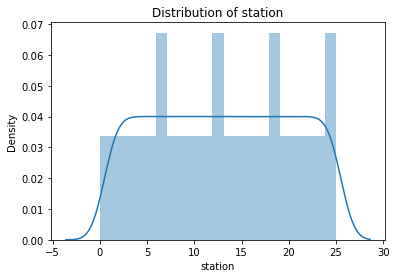

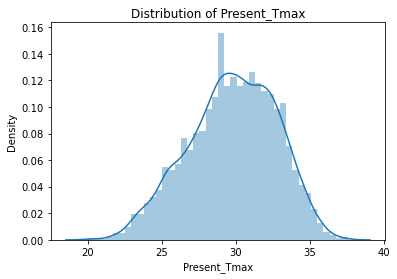

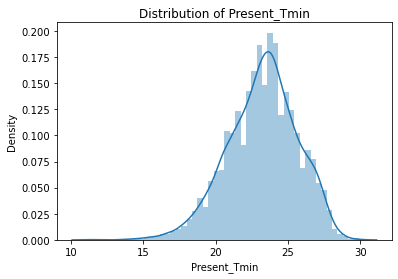

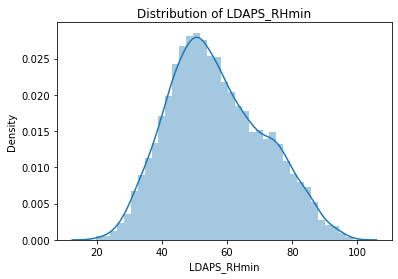

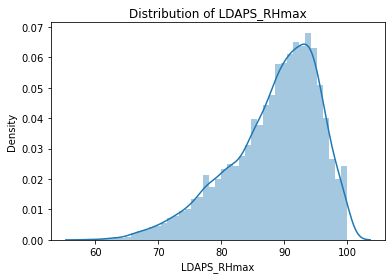

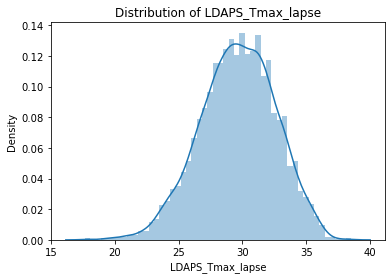

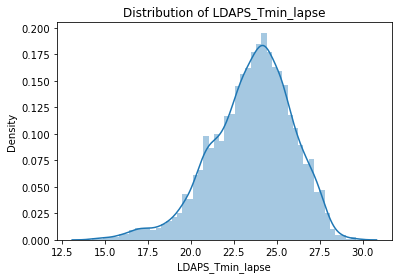

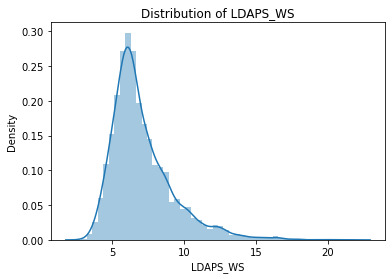

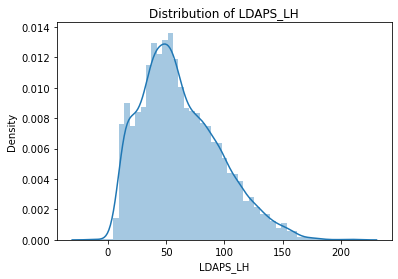

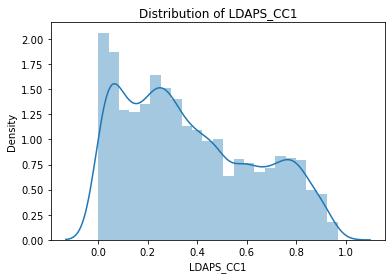

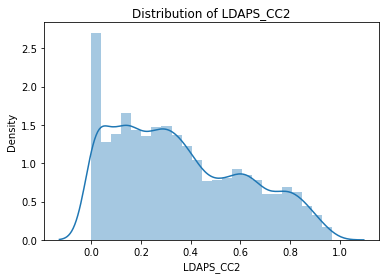

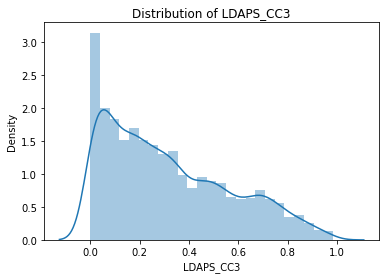

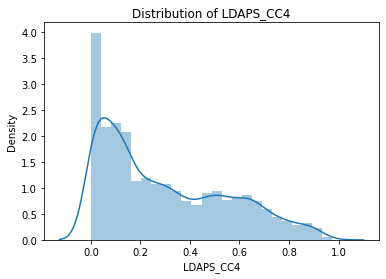

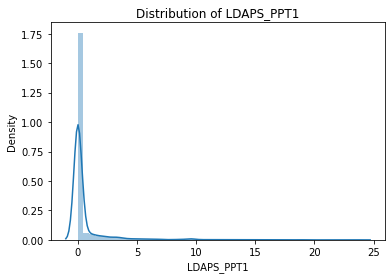

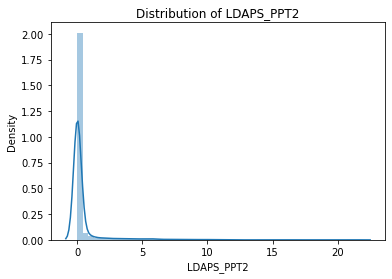

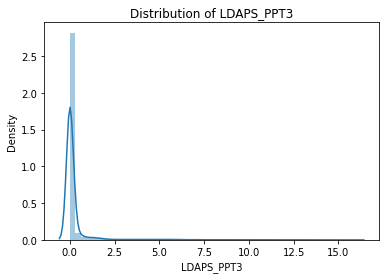

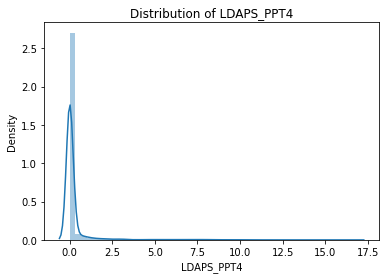

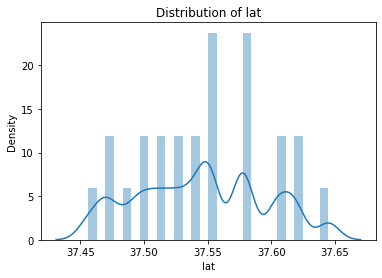

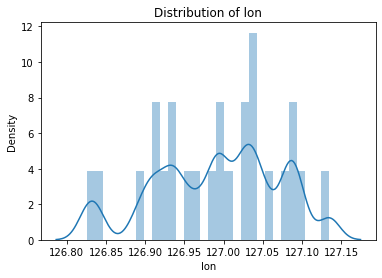

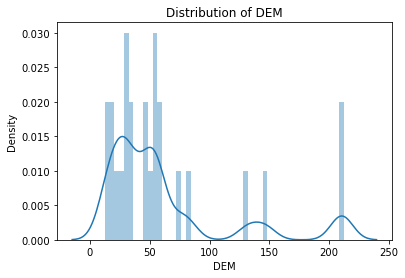

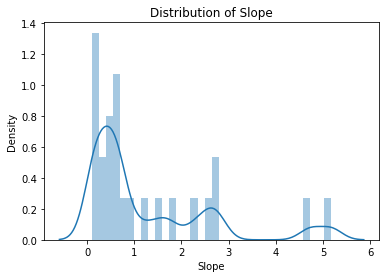

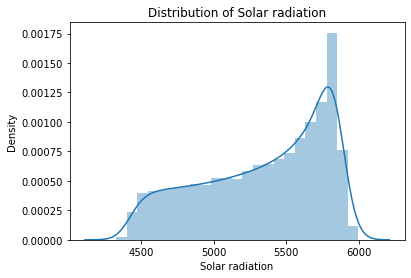

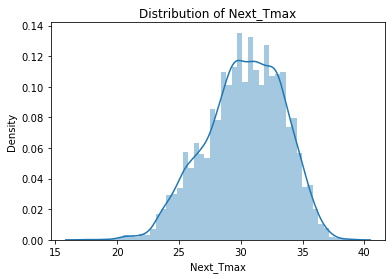

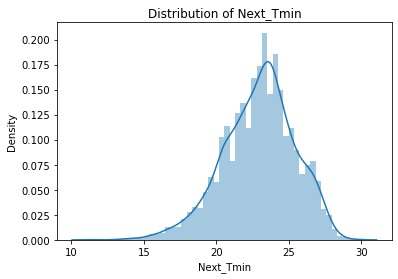

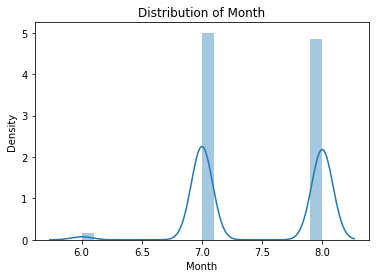

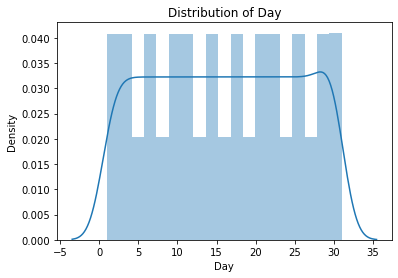

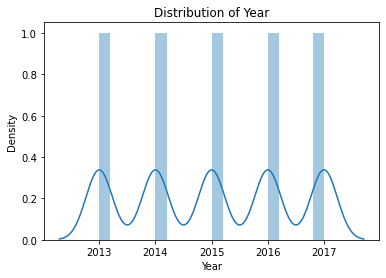

In [83]:
# to check for the distribution of the dataframe.
for column in df.columns:
    sns.distplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

In [84]:
[skewed_features] = {'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','LDAPS_WS'}

ValueError: too many values to unpack (expected 1)

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Instantiate the transformer
yeo_johnson_transform = PowerTransformer(method='yeo-johnson')

# Apply the transformation
df[skewed_features] = yeo_johnson_transform.fit_transform(df[skewed_features])

# Verify the skewness after transformation
for column in df.columns:
    print(f"{column}: {df[column].skew()}")

In [ ]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data= df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# Define columns to look at
out_features = df[['Present_Tmax', 'Next_Tmin', 'LDAPS_Tmax_lapse', 'Next_Tmax', 'Next_Tmin', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'LDAPS_CC4', 
                   'Present_Tmin', 'LDAPS_WS', 'LDAPS_LH']]

# Calculate z-scores
z = np.abs(zscore(out_features))

print(z)

In [ ]:
#Defining a threshold limit
threshold = 3

In [ ]:
# Removing outliers
df1 = df[(z < threshold).all(axis=1)]

In [ ]:
# Print shapes to check data loss
print("Old dataframe shape: ", df.shape)
print("New dataframe shape: ", df1.shape)

In [ ]:
# Calculate data loss
data_loss = ((df.shape[0] - df1.shape[0]) / df1.shape[0]) * 100
print("Data Loss Percentage =", data_loss)

# Define your X and y here after removing outliers
X1 = df.drop(['Next_Tmax'], axis=1)
Y1= df['Next_Tmax']

In [ ]:
# Split the data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
# traing the model. 
lr = LinearRegression()
lr.fit(X1_train, Y1_train)

rfr = RandomForestRegressor()
rfr.fit(X1_train, Y1_train)

gr = GradientBoostingRegressor()
gr.fit(X1_train, Y1_train)

dt = DecisionTreeRegressor()
dt.fit(X1_train, Y1_train)

In [ ]:
# Make predictions on the test data
lr_predictions = lr.predict(X1_test)
rfr_predictions = rfr.predict(X1_test)
gr_predictions = gr.predict(X1_test)
dt_predictions = dt.predict(X1_test)

# Evaluate the models
lr_mse = mean_squared_error(Y1_test, lr_predictions)
rfr_mse = mean_squared_error(Y1_test, rfr_predictions)
gr_mse = mean_squared_error(Y1_test, gr_predictions)
dt_mse = mean_squared_error(Y1_test, dt_predictions)

lr_mae = mean_absolute_error(Y1_test, lr_predictions)
rfr_mae = mean_absolute_error(Y1_test, rfr_predictions)
gr_mae = mean_absolute_error(Y1_test, gr_predictions)
dt_mae = mean_absolute_error(Y1_test, dt_predictions)

lr_r2 = r2_score(Y1_test, lr_predictions)
rfr_r2 = r2_score(Y1_test, rfr_predictions)
gr_r2 = r2_score(Y1_test, gr_predictions)
dt_r2 = r2_score(Y1_test, dt_predictions)

In [ ]:
# Print Mean Squared Error for each model
print("Linear Regression MSE: ", lr_mse)
print("Random Forest Regressor MSE: ", rfr_mse)
print("Gradient Boosting Regressor MSE: ", gr_mse)
print("Decision Tree Regressor MSE: ", dt_mse)

# Print Mean Absolute Error for each model
print("\nLinear Regression MAE: ", lr_mae)
print("Random Forest Regressor MAE: ", rfr_mae)
print("Gradient Boosting Regressor MAE: ", gr_mae)
print("Decision Tree Regressor MAE: ", dt_mae)

# Print R2 Score for each model
print("\nLinear Regression R2 Score: ", lr_r2)
print("Random Forest Regressor R2 Score: ", rfr_r2)
print("Gradient Boosting Regressor R2 Score: ", gr_r2)
print("Decision Tree Regressor R2 Score: ", dt_r2)

In [ ]:
# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse, rfr_mse, gr_mse, dt_mse],
    'Mean Absolute Error (MAE)': [lr_mae, rfr_mae, gr_mae, dt_mae],
    'R^2 Score': [lr_r2, rfr_r2, gr_r2, dt_r2]}

df_Tmin = pd.DataFrame(data)

# Print the DataFrame
print(df)

In [ ]:
# Prection on the test data. 
y_pred1 = lr.predict(X1_test)
y_pred2 = rfr.predict(X1_test)
y_pred3 = gr.predict(X1_test)
y_pred4 = dt.predict(X1_test)
df2 = pd.DataFrame({'Actual': Y1_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [ ]:
df2

In [ ]:
plt.subplot
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# Repeat the above code for other subplots (222, 223, 224)
plt.subplot
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()

In [109]:
# Calculating mean squared error (MSE) for each model
mse_lr = mean_squared_error(df2['Actual'], df2['Lr'])
mse_rfr = mean_squared_error(df2['Actual'], df2['rfr'])
mse_gr = mean_squared_error(df2['Actual'], df2['gr'])
mse_dt = mean_squared_error(df2['Actual'], df2['dt'])

# dictionary that stores the MSE values
mse_scores = {'Linear Regression': mse_lr,
    'Random Forest': mse_rfr,
    'Gradient Boosting': mse_gr,
    'Decision Tree': mse_dt}

# To find the best model 
best_model = min(mse_scores, key=mse_scores.get)

print("The best model is:", best_model)

NameError: name 'df2' is not defined

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X1_train, Y1_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print()

# Train the best model on the entire training set
best_model.fit(X1_train, Y1_train)

# Evaluate the best model on the testing set
best_predictions = best_model.predict(X1_test)
best_mse = mean_squared_error(Y1_test, best_predictions)
best_mae = mean_absolute_error(Y1_test, best_predictions)
best_r2 = r2_score(Y1_test, best_predictions)

print("Best Model Evaluation:")
print("MSE:", best_mse)
print("MAE:", best_mae)
print("R-squared:", best_r2)

In [ ]:
# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse, rfr_mse, gr_mse, dt_mse],
    'Mean Absolute Error (MAE)': [lr_mae, rfr_mae, gr_mae, dt_mae],
    'R^2 Score': [lr_r3, rfr_r3, gr_r3, dt_r3]}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

In [ ]:
# Import the joblib module
from joblib import dump, load

# Save the model to disk
filename = 'finalized_model.joblib'
dump(best_model, filename)

# Load the model from disk
loaded_model = load(filename)

# Use the model to make predictions
result = loaded_model.score(X1_test, Y1_test)
print(result)

In [88]:
#Predicting the another Model 

In [89]:
# for the Next Tmin value 
X2 = df.drop(['Next_Tmin'],axis=1)
y2 = df['Next_Tmin']

In [90]:
# Split the data
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# scaling the data
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [96]:
# fitting the model for the  
lr = LinearRegression()
lr.fit(X2_train, Y2_train)

rfr = RandomForestRegressor()
rfr.fit(X2_train, Y2_train)

gr = GradientBoostingRegressor()
gr.fit(X2_train, Y2_train)

dt = DecisionTreeRegressor()
dt.fit(X2_train, Y2_train)

DecisionTreeRegressor()

In [100]:
# Make predictions on the test data
lr_predictions = lr.predict(X2_test)
rfr_predictions = rfr.predict(X2_test)
gr_predictions = gr.predict(X2_test)
dt_predictions = dt.predict(X2_test)

# Evaluate the models
lr_mse2 = mean_squared_error(Y2_test, lr_predictions)
rfr_mse2 = mean_squared_error(Y2_test, rfr_predictions)
gr_mse2 = mean_squared_error(Y2_test, gr_predictions)
dt_mse2 = mean_squared_error(Y2_test, dt_predictions)

lr_mae2 = mean_absolute_error(Y2_test, lr_predictions)
rfr_mae2 = mean_absolute_error(Y2_test, rfr_predictions)
gr_mae2 = mean_absolute_error(Y2_test, gr_predictions)
dt_mae2 = mean_absolute_error(Y2_test, dt_predictions)

lr_r2_2 = r2_score(Y2_test, lr_predictions)
rfr_r2_2 = r2_score(Y2_test, rfr_predictions)
gr_r2_2= r2_score(Y2_test, gr_predictions)
dt_r2_2 = r2_score(Y2_test, dt_predictions)

In [101]:
# Print Mean Squared Error for each model
print("Linear Regression MSE: ", lr_mse2)
print("Random Forest Regressor MSE: ", rfr_mse2)
print("Gradient Boosting Regressor MSE: ", gr_mse2)
print("Decision Tree Regressor MSE: ", dt_mse2)

# Print Mean Absolute Error for each model
print("\nLinear Regression MAE: ", lr_mae2)
print("Random Forest Regressor MAE: ", rfr_mae2)
print("Gradient Boosting Regressor MAE: ", gr_mae2)
print("Decision Tree Regressor MAE: ", dt_mae2)

# Print R2 Score for each model
print("\nLinear Regression R2 Score: ", lr_r2_2)
print("Random Forest Regressor R2 Score: ", rfr_r2_2)
print("Gradient Boosting Regressor R2 Score: ", gr_r2_2)
print("Decision Tree Regressor R2 Score: ", dt_r2_2)

Linear Regression MSE:  1.8823844540500203
Random Forest Regressor MSE:  0.8158223939393929
Gradient Boosting Regressor MSE:  1.2283373388775354
Decision Tree Regressor MSE:  1.860206318504191

Linear Regression MAE:  1.0478134051588976
Random Forest Regressor MAE:  0.675711798839458
Gradient Boosting Regressor MAE:  0.8633850978068769
Decision Tree Regressor MAE:  0.9836234687298516

Linear Regression R2 Score:  0.8077670269960402
Random Forest Regressor R2 Score:  0.916686538771208
Gradient Boosting Regressor R2 Score:  0.8745596639431625
Decision Tree Regressor R2 Score:  0.8100319038241965


In [102]:
# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse2, rfr_mse2, gr_mse2, dt_mse2],
    'Mean Absolute Error (MAE)': [lr_mae2, rfr_mae2, gr_mae2, dt_mae2],
    'R^2 Score': [lr_r2_2, rfr_r2_2, gr_r2_2, dt_r2_2]}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

               Model  Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
0  Linear Regression                  1.882384                   1.047813   
1      Random Forest                  0.815822                   0.675712   
2  Gradient Boosting                  1.228337                   0.863385   
3      Decision Tree                  1.860206                   0.983623   

   R^2 Score  
0   0.807767  
1   0.916687  
2   0.874560  
3   0.810032  


In [103]:
# Prection on the test data. 
y_pred1 = lr.predict(X2_test)
y_pred2 = rfr.predict(X2_test)
y_pred3 = gr.predict(X2_test)
y_pred4 = dt.predict(X2_test)
df3 = pd.DataFrame({'Actual': Y2_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [104]:
df3

,Actual,Lr,rfr,gr,dt
5082,28.3,28.435694,28.514,28.923838,29.4
5597,35.9,34.672556,35.077,35.007355,34.3
1623,25.3,26.311462,25.267,25.996384,25.9
6821,35.9,33.322403,34.480,33.492280,34.9
3892,33.4,31.621547,33.005,32.734375,33.1
...,...,...,...,...,...
4838,32.9,32.279561,32.822,32.636881,33.1
6636,31.0,30.789361,31.265,31.749306,31.7
5369,28.2,30.141600,28.044,29.698493,27.7
2789,25.2,25.769888,26.038,25.595966,26.3


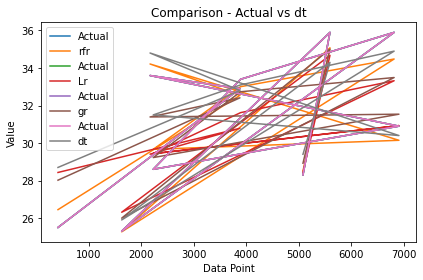

In [106]:
# For rfr2 comparison
plt.subplot()
plt.plot(df3['Actual'].iloc[0:10], label='Actual')
plt.plot(df3['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# For Lr2 comparison
plt.subplot()
plt.plot(df3['Actual'].iloc[0:10], label='Actual')
plt.plot(df3['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

# For gr2 comparison
plt.subplot()
plt.plot(df3['Actual'].iloc[0:10], label='Actual')
plt.plot(df3['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

# For dt2 comparison
plt.subplot()
plt.plot(df3['Actual'].iloc[0:10], label='Actual')
plt.plot(df3['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()

In [108]:
# Calculating mean squared error (MSE) for each model
mse_lr = mean_squared_error(df3['Actual'], df3['Lr'])
mse_rfr = mean_squared_error(df3['Actual'], df3['rfr'])
mse_gr = mean_squared_error(df3['Actual'], df3['gr'])
mse_dt = mean_squared_error(df3['Actual'], df3['dt'])

# dictionary that stores the MSE values
mse_scores = {'Linear Regression': mse_lr,
    'Random Forest': mse_rfr,
    'Gradient Boosting': mse_gr,
    'Decision Tree': mse_dt}

# To find the best model 
best_model = min(mse_scores, key=mse_scores.get)

print("The best model is:", best_model)

The best model is: Random Forest


In [ ]:
#Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X2_train, Y2_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print()

# Train the best model on the entire training set
best_model.fit(X2_train, Y2_train)

# Evaluate the best model on the testing set
best_predictions = best_model.predict(X1_test)
best_mse = mean_squared_error(Y2_test, best_predictions)
best_mae = mean_absolute_error(Y2_test, best_predictions)
best_r2 = r2_score(Y2_test, best_predictions)

print("Best Model Evaluation:")
print("MSE:", best_mse)
print("MAE:", best_mae)
print("R-squared:", best_r2)

In [ ]:
# Create a table to compare the scores
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Mean Squared Error (MSE)': [lr_mse2, rfr_mse2, gr_mse2, dt_mse2],
    'Mean Absolute Error (MAE)': [lr_mae2, rfr_mae2, gr_mae2, dt_mae2],
    'R^2 Score': [lr_r2_2, rfr_r2_2, gr_r2_2, dt_r2_2]}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)